# Overview

**Context**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Content**

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

# Approach

- Loading Data

- Input and Output Data

- Applying Regular Expression

- Each word to lower case

- Splitting words to Tokenize

- Stemming with PorterStemmer handling Stop Words

- Preparing Messages with Remaining Tokens

- Preparing WordVector Corpus

- Applying Classification

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re

# Fonction de prétraitement pour remplacer les éléments spécifiques
def preprocess_sms(sms):
    # Remplacer les adresses email
    sms = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', 'emailaddr', sms)
    # Remplacer les URLs
    sms = re.sub(r'(http|https)://[^\s]+', 'httpaddr', sms)
    # Remplacer les symboles monétaires
    sms = re.sub(r'\£|\$', 'moneysymb', sms)
    # Remplacer les numéros de téléphone (au format général)
    sms = re.sub(r'\b\d{10,}\b', 'phonenumbr', sms)
    # Remplacer les nombres
    sms = re.sub(r'\b\d+\b', 'numbr', sms)
    
    return sms

# Appliquer le prétraitement à une liste de SMS
def preprocess_sms_list(sms_list):
    return [preprocess_sms(sms) for sms in sms_list]

# Chargement des données
data = pd.read_csv('spam.csv', names=['label', 'message'])

print(data.describe())
# Vérification des valeurs manquantes
print(data.isnull().sum())

# Suppression des lignes contenant des valeurs manquantes
data.dropna(subset=['label', 'message'], inplace=True)

# Suppression des lignes où les messages ou labels sont des chaînes vides ou contenant uniquement des espaces
# Supprimer les espaces en début et fin
data['label'] = data['label'].str.strip()
data['message'] = data['message'].str.strip()

# Garder uniquement les lignes où les labels sont 'ham' ou 'spam'
data = data[data['label'].isin(['ham', 'spam'])]

# Vérification des valeurs non valides dans la colonne 'label'
print(data['label'].unique())

# On garde uniquement les colonnes pertinentes
data = data[['label', 'message']]


# Transformation des labels en binaire: spam = 1, ham = 0
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Préparation des données
X = data['message']  # les SMS
y = data['label']    # les étiquettes (spam ou ham)

# Appliquer le prétraitement aux SMS
preprocessed_sms = preprocess_sms_list(X)

# Vectorisation des SMS en compte de mots
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_sms)

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Modèle de classification Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = nb.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

       label  message
count     67       67
unique     3       67
top      ham  message
freq      37        1
label      0
message    0
dtype: int64
['ham' 'spam']
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



Accuracy (Précision globale) :
Le modèle atteint une précision de 95%. Cela signifie que 95% des prédictions sont correctes (qu'il s'agisse de ham ou de spam).

Precision, Recall, F1-Score :
Pour la classe 0 (Ham) :
Precision : 1.00 (aucun faux positif pour cette classe, ce qui est parfait).
Recall : 0.92 (le modèle a trouvé 92% des vrais "ham" sans les classer à tort comme spam).
F1-Score : 0.96, ce qui montre un excellent équilibre entre précision et rappel.

Pour la classe 1 (Spam) :
Precision : 0.88 (quelques faux positifs pour le spam, mais cela reste bon).
Recall : 1.00 (le modèle n'a raté aucun spam dans les prédictions).

F1-Score : 0.93, ce qui est également une bonne performance pour la classe spam.


Macro Avg et Weighted Avg :
Macro Avg calcule la moyenne des métriques pour chaque classe sans pondération, ce qui montre un équilibre global de 0.94 à 0.96 pour précision, rappel et F1-score.
Weighted Avg prend en compte le support (nombre d'occurrences par classe) et montre que le modèle gère bien l'ensemble du jeu de données, même avec un déséquilibre entre les classes (13 ham et 7 spam).

Le modèle fonctionne très bien, avec une précision élevée pour les deux classes. Quelques ajustements pourraient améliorer la précision pour la classe spam, mais globalement, c'est un excellent résultat avec un bon équilibre entre les classes.

In [13]:
new_sms = [
    "Congratulations! You have won a free vacation. Click here to claim your prize.",
    "Are we still on for the meeting tomorrow morning?",
    "Get your free coupon today! Limited time offer, click now!",
    "Hey, don't forget to bring the documents for our meeting later.",
    "Your account has been compromised. Please call 123-456-7890 immediately.",
    "Let's have lunch tomorrow, I'll text you the details."
]

# Vectorisation des nouveaux SMS
new_sms_vectorized = vectorizer.transform(new_sms)

# Prédiction avec le modèle Naive Bayes déjà entraîné
predictions = nb.predict(new_sms_vectorized)

# Affichage des résultats
for sms, label in zip(new_sms, predictions):
    print(f"SMS: {sms}\nPredicted: {'spam' if label == 1 else 'ham'}\n")

SMS: Congratulations! You have won a free vacation. Click here to claim your prize.
Predicted: spam

SMS: Are we still on for the meeting tomorrow morning?
Predicted: ham

SMS: Get your free coupon today! Limited time offer, click now!
Predicted: spam

SMS: Hey, don't forget to bring the documents for our meeting later.
Predicted: ham

SMS: Your account has been compromised. Please call 123-456-7890 immediately.
Predicted: spam

SMS: Let's have lunch tomorrow, I'll text you the details.
Predicted: ham



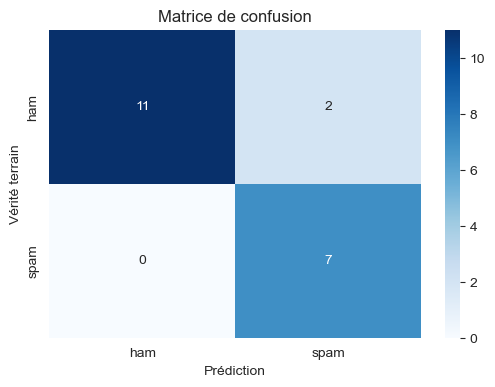

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

## Processing Messages

In [15]:
for i in range(0, 5572):

    # Applying Regular Expression
    
    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    msg = df['v2'][i]
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['v2'][i])
    msg = re.sub('£|\$', 'moneysymb', df['v2'][i])
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['v2'][i])
    msg = re.sub('\d+(\.\d+)?', 'numbr', df['v2'][i])
    
    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', df['v2'][i])
    
    if i<2:
        print("\t\t\t\t MESSAGE ", i)
    
    if i<2:
        print("\n After Regular Expression - Message ", i, " : ", msg)
    
    # Each word to lower case
    msg = msg.lower()    
    if i<2:
        print("\n Lower case Message ", i, " : ", msg)
    
    # Splitting words to Tokenize
    msg = msg.split()    
    if i<2:
        print("\n After Splitting - Message ", i, " : ", msg)
    
    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i<2:
        print("\n After Stemming - Message ", i, " : ", msg)
    
    # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    if i<2:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
    
    # Preparing WordVector Corpus
    corpus.append(msg)

<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\+'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\w'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\+'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\w'
/var/folders/xb/33plxr1n54l6c8kzjxnrzpwc0000gp/T/ipykernel_589/21116109.py:13: SyntaxWarning: invalid escape sequence '\w'
  msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])
/var/folders/xb/33plxr1n54l6c8kzjxnrzpwc0000gp/T/ipykernel_589/21116109.py:14: SyntaxWarning: invalid escape sequence '\S'
  msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df

NameError: name 'df' is not defined

In [14]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

# Applying Classification

- Input : Prepared Sparse Matrix
- Ouput : Labels (Spam or Ham)

In [15]:
y = df['v1']
print (y.value_counts())

print(y[0])
print(y[1])

0    4825
1     747
Name: v1, dtype: int64
0
0


### Encoding Labels

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


### Splitting to Training and Testing DATA

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)

# Applying Guassian Naive Bayes

In [19]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(xtrain, ytrain)

GaussianNB(priors=None)

In [20]:
# Predicting
y_pred = bayes_classifier.predict(xtest)

## Results

In [21]:
# Evaluating
cm = confusion_matrix(ytest, y_pred)

In [22]:
cm

array([[824, 125],
       [ 19, 147]], dtype=int64)

In [23]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, bayes_classifier.predict(xtest)))
print (classification_report(ytest, bayes_classifier.predict(xtest)))

Accuracy : 0.87085 


             precision    recall  f1-score   support

          0       0.98      0.87      0.92       949
          1       0.54      0.89      0.67       166

avg / total       0.91      0.87      0.88      1115



# Applying Decision Tree

In [25]:
dt = DecisionTreeClassifier(random_state=50)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [31]:
# Predicting
y_pred_dt = dt.predict(xtest)

## Results

In [33]:
# Evaluating
cm = confusion_matrix(ytest, y_pred_dt)

print(cm)

[[943   6]
 [ 29 137]]


In [30]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, dt.predict(xtest)))
print (classification_report(ytest, dt.predict(xtest)))

Accuracy : 0.96861 


             precision    recall  f1-score   support

          0       0.97      0.99      0.98       949
          1       0.96      0.83      0.89       166

avg / total       0.97      0.97      0.97      1115



# Final Accuracy

- **Decision Tree : 96.861%**
- **Guassian NB   : 87.085%**   

Thanks for having a look :) ....Please give my kernel an **UPVOTE** 